## Author: Sruti Keerti Munukutla

In [1]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset
import torch
from torch.utils.data import DataLoader

In [2]:
#Use custom dataset class wrap a pandas dataframe in PyTorch DataLoader
class MyDataset(Dataset):
 
  def __init__(self,file_name):
    heart_train_df=pd.read_csv(file_name)
 
    #use encoder for replacing categorical values with int
    encoder = LabelEncoder()
    heart_train_df['Sex'] = encoder.fit_transform(heart_train_df['Sex'])
    heart_train_df['ChestPainType'] = encoder.fit_transform(heart_train_df['ChestPainType'])
    heart_train_df['RestingECG'] = encoder.fit_transform(heart_train_df['RestingECG'])
    heart_train_df['ExerciseAngina'] = encoder.fit_transform(heart_train_df['ExerciseAngina'])
    heart_train_df['ST_Slope'] = encoder.fit_transform(heart_train_df['ST_Slope'])
    X_train = heart_train_df.iloc[:,0:11].values
    y_train = heart_train_df.iloc[:,11].values
    
    self.x_train=torch.tensor(X_train,dtype=torch.float32)
    self.y_train=torch.tensor(y_train,dtype=torch.float32)
 
  def __len__(self):
    return len(self.y_train)

  def __getitem__(self,idx):
    return self.x_train[idx],self.y_train[idx]

In [3]:
train_data=MyDataset('./data-heart/heart_train_718.csv')
train_loader=DataLoader(train_data,batch_size=10,shuffle=False)
test_data = MyDataset('./data-heart/heart_test_200.csv')
test_loader=DataLoader(test_data,batch_size=10,shuffle=False)


for i, (data, target) in enumerate(train_loader):
    print(data.shape, target.shape)
    print(data,target)
    break;

torch.Size([10, 11]) torch.Size([10])
tensor([[ 66.0000,   0.0000,   2.0000, 146.0000, 278.0000,   0.0000,   0.0000,
         152.0000,   0.0000,   0.0000,   1.0000],
        [ 65.0000,   1.0000,   0.0000, 150.0000, 235.0000,   0.0000,   1.0000,
         120.0000,   1.0000,   1.5000,   1.0000],
        [ 63.0000,   1.0000,   0.0000, 150.0000, 223.0000,   0.0000,   1.0000,
         115.0000,   0.0000,   0.0000,   1.0000],
        [ 58.0000,   1.0000,   1.0000, 136.0000, 164.0000,   0.0000,   2.0000,
          99.0000,   1.0000,   2.0000,   1.0000],
        [ 54.0000,   1.0000,   1.0000, 192.0000, 283.0000,   0.0000,   0.0000,
         195.0000,   0.0000,   0.0000,   2.0000],
        [ 38.0000,   0.0000,   0.0000, 105.0000,   0.0000,   1.0000,   1.0000,
         166.0000,   0.0000,   2.8000,   2.0000],
        [ 58.0000,   1.0000,   0.0000, 100.0000, 213.0000,   0.0000,   2.0000,
         110.0000,   0.0000,   0.0000,   2.0000],
        [ 51.0000,   1.0000,   1.0000, 130.0000, 224.0000, 

In [4]:
import torch
import torch.nn as nn
input_features, hidden_layer1_count, output_layer_count, batch_size, learning_rate = 11, 10, 1, 10, 0.01
n_epochs = 20
log_interval = 10
model = nn.Sequential(nn.Linear(input_features, hidden_layer1_count),
                      nn.ReLU(),
                      nn.Linear(hidden_layer1_count, output_layer_count),
                      nn.Sigmoid())
print(model)

Sequential(
  (0): Linear(in_features=11, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
  (3): Sigmoid()
)


In [5]:
#using mean squared error loss function
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [6]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        #forward pass
        output = model(data)
        loss = loss_function(output, target)
        #backward propagartion
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))

In [7]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += loss_function(output, target)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [8]:
train_losses = []
train_counter = []
for epoch in range(1, n_epochs + 1):
    train(epoch)
print(len(train_losses))

Train Epoch: 1 [0/718 (0%)]	Loss: 0.577607
Train Epoch: 1 [100/718 (14%)]	Loss: 0.259797
Train Epoch: 1 [200/718 (28%)]	Loss: 0.284892
Train Epoch: 1 [300/718 (42%)]	Loss: 0.268856
Train Epoch: 1 [400/718 (56%)]	Loss: 0.232975
Train Epoch: 1 [500/718 (69%)]	Loss: 0.261666
Train Epoch: 1 [600/718 (83%)]	Loss: 0.263902
Train Epoch: 1 [700/718 (97%)]	Loss: 0.258132
Train Epoch: 2 [0/718 (0%)]	Loss: 0.238242
Train Epoch: 2 [100/718 (14%)]	Loss: 0.253714
Train Epoch: 2 [200/718 (28%)]	Loss: 0.290071
Train Epoch: 2 [300/718 (42%)]	Loss: 0.290901
Train Epoch: 2 [400/718 (56%)]	Loss: 0.221225
Train Epoch: 2 [500/718 (69%)]	Loss: 0.255617
Train Epoch: 2 [600/718 (83%)]	Loss: 0.253630
Train Epoch: 2 [700/718 (97%)]	Loss: 0.262470
Train Epoch: 3 [0/718 (0%)]	Loss: 0.245770
Train Epoch: 3 [100/718 (14%)]	Loss: 0.253434
Train Epoch: 3 [200/718 (28%)]	Loss: 0.271929
Train Epoch: 3 [300/718 (42%)]	Loss: 0.279431
Train Epoch: 3 [400/718 (56%)]	Loss: 0.217718
Train Epoch: 3 [500/718 (69%)]	Loss: 0.2581

/usr/local/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Epoch: 5 [700/718 (97%)]	Loss: 0.264675
Train Epoch: 6 [0/718 (0%)]	Loss: 0.244261
Train Epoch: 6 [100/718 (14%)]	Loss: 0.253587
Train Epoch: 6 [200/718 (28%)]	Loss: 0.265462
Train Epoch: 6 [300/718 (42%)]	Loss: 0.282883
Train Epoch: 6 [400/718 (56%)]	Loss: 0.215682
Train Epoch: 6 [500/718 (69%)]	Loss: 0.256179
Train Epoch: 6 [600/718 (83%)]	Loss: 0.251394
Train Epoch: 6 [700/718 (97%)]	Loss: 0.264128
Train Epoch: 7 [0/718 (0%)]	Loss: 0.243764
Train Epoch: 7 [100/718 (14%)]	Loss: 0.253988
Train Epoch: 7 [200/718 (28%)]	Loss: 0.263990
Train Epoch: 7 [300/718 (42%)]	Loss: 0.282191
Train Epoch: 7 [400/718 (56%)]	Loss: 0.216020
Train Epoch: 7 [500/718 (69%)]	Loss: 0.255046
Train Epoch: 7 [600/718 (83%)]	Loss: 0.251297
Train Epoch: 7 [700/718 (97%)]	Loss: 0.263671
Train Epoch: 8 [0/718 (0%)]	Loss: 0.243307
Train Epoch: 8 [100/718 (14%)]	Loss: 0.254092
Train Epoch: 8 [200/718 (28%)]	Loss: 0.262414
Train Epoch: 8 [300/718 (42%)]	Loss: 0.281879
Train Epoch: 8 [400/718 (56%)]	Loss: 0.2161

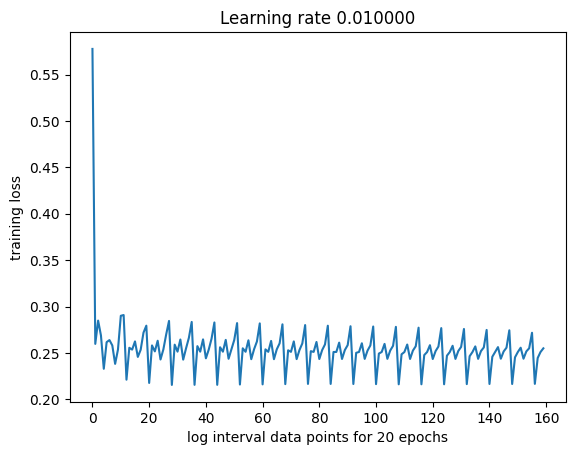

In [9]:
import matplotlib.pyplot as plt
plt.plot(train_losses)
plt.ylabel('training loss')
plt.xlabel('log interval data points for 20 epochs')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [10]:
test_losses = []
test()


Test set: Avg. loss: 0.0249, Accuracy: 95/200 (48%)



/usr/local/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([10])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## Model : 2 -  Increasing hidden layers

In [11]:
input_features, hidden_layer1_count, hidden_layer2_count,hidden_layer3_count, hidden_layer4_count, output_layer_count, batch_size, learning_rate = 11, 15,20,30,40, 1, 10, 0.01
n_epochs = 100
log_interval = 10

In [12]:
model_2 = nn.Sequential(nn.Linear(input_features, hidden_layer1_count),
                      nn.ReLU(),
                      nn.Linear(hidden_layer1_count, hidden_layer2_count),
                      nn.ReLU(),
                      nn.Linear(hidden_layer2_count, hidden_layer3_count),
                      nn.ReLU(),
                      nn.Linear(hidden_layer3_count, hidden_layer4_count),
                      nn.ReLU(),
                      nn.Linear(hidden_layer4_count, output_layer_count),
                      nn.Sigmoid())
print(model_2)

Sequential(
  (0): Linear(in_features=11, out_features=15, bias=True)
  (1): ReLU()
  (2): Linear(in_features=15, out_features=20, bias=True)
  (3): ReLU()
  (4): Linear(in_features=20, out_features=30, bias=True)
  (5): ReLU()
  (6): Linear(in_features=30, out_features=40, bias=True)
  (7): ReLU()
  (8): Linear(in_features=40, out_features=1, bias=True)
  (9): Sigmoid()
)


In [13]:
#using mean squared error loss function
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=learning_rate)

In [14]:
def train_2(epoch):
    model_2.train()
    for batch_idx, (data, target) in enumerate(train_loader):
    
        #forward pass
        output = model_2(data)
        loss = loss_function(output, target)

        #backward propagartion
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
            epoch, batch_idx * len(data), len(train_loader.dataset),
            100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
            (batch_idx*batch_size) + ((epoch-1)*len(train_loader.dataset)))

In [15]:
train_losses = []
train_counter = []
for epoch in range(1, n_epochs + 1):
    train_2(epoch)

/usr/local/lib/python3.9/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Train Epoch: 1 [0/718 (0%)]	Loss: 0.589013
Train Epoch: 1 [100/718 (14%)]	Loss: 0.256639
Train Epoch: 1 [200/718 (28%)]	Loss: 0.464562
Train Epoch: 1 [300/718 (42%)]	Loss: 0.384860
Train Epoch: 1 [400/718 (56%)]	Loss: 0.210569
Train Epoch: 1 [500/718 (69%)]	Loss: 0.289853
Train Epoch: 1 [600/718 (83%)]	Loss: 0.252858
Train Epoch: 1 [700/718 (97%)]	Loss: 0.276161
Train Epoch: 2 [0/718 (0%)]	Loss: 0.215688
Train Epoch: 2 [100/718 (14%)]	Loss: 0.250889
Train Epoch: 2 [200/718 (28%)]	Loss: 0.311495
Train Epoch: 2 [300/718 (42%)]	Loss: 0.356090
Train Epoch: 2 [400/718 (56%)]	Loss: 0.213748
Train Epoch: 2 [500/718 (69%)]	Loss: 0.281923
Train Epoch: 2 [600/718 (83%)]	Loss: 0.251412
Train Epoch: 2 [700/718 (97%)]	Loss: 0.276938
Train Epoch: 3 [0/718 (0%)]	Loss: 0.210764
Train Epoch: 3 [100/718 (14%)]	Loss: 0.250481
Train Epoch: 3 [200/718 (28%)]	Loss: 0.281942
Train Epoch: 3 [300/718 (42%)]	Loss: 0.330768
Train Epoch: 3 [400/718 (56%)]	Loss: 0.214195
Train Epoch: 3 [500/718 (69%)]	Loss: 0.2669

Train Epoch: 25 [200/718 (28%)]	Loss: 0.254175
Train Epoch: 25 [300/718 (42%)]	Loss: 0.273886
Train Epoch: 25 [400/718 (56%)]	Loss: 0.223417
Train Epoch: 25 [500/718 (69%)]	Loss: 0.229243
Train Epoch: 25 [600/718 (83%)]	Loss: 0.254360
Train Epoch: 25 [700/718 (97%)]	Loss: 0.237530
Train Epoch: 26 [0/718 (0%)]	Loss: 0.231302
Train Epoch: 26 [100/718 (14%)]	Loss: 0.252708
Train Epoch: 26 [200/718 (28%)]	Loss: 0.254173
Train Epoch: 26 [300/718 (42%)]	Loss: 0.273938
Train Epoch: 26 [400/718 (56%)]	Loss: 0.223966
Train Epoch: 26 [500/718 (69%)]	Loss: 0.228912
Train Epoch: 26 [600/718 (83%)]	Loss: 0.254473
Train Epoch: 26 [700/718 (97%)]	Loss: 0.237755
Train Epoch: 27 [0/718 (0%)]	Loss: 0.231289
Train Epoch: 27 [100/718 (14%)]	Loss: 0.252710
Train Epoch: 27 [200/718 (28%)]	Loss: 0.254089
Train Epoch: 27 [300/718 (42%)]	Loss: 0.274301
Train Epoch: 27 [400/718 (56%)]	Loss: 0.223515
Train Epoch: 27 [500/718 (69%)]	Loss: 0.229256
Train Epoch: 27 [600/718 (83%)]	Loss: 0.254415
Train Epoch: 27 [70

Train Epoch: 49 [300/718 (42%)]	Loss: 0.273133
Train Epoch: 49 [400/718 (56%)]	Loss: 0.223599
Train Epoch: 49 [500/718 (69%)]	Loss: 0.229177
Train Epoch: 49 [600/718 (83%)]	Loss: 0.254647
Train Epoch: 49 [700/718 (97%)]	Loss: 0.234955
Train Epoch: 50 [0/718 (0%)]	Loss: 0.230020
Train Epoch: 50 [100/718 (14%)]	Loss: 0.252780
Train Epoch: 50 [200/718 (28%)]	Loss: 0.254018
Train Epoch: 50 [300/718 (42%)]	Loss: 0.273174
Train Epoch: 50 [400/718 (56%)]	Loss: 0.223712
Train Epoch: 50 [500/718 (69%)]	Loss: 0.229413
Train Epoch: 50 [600/718 (83%)]	Loss: 0.254659
Train Epoch: 50 [700/718 (97%)]	Loss: 0.234880
Train Epoch: 51 [0/718 (0%)]	Loss: 0.230006
Train Epoch: 51 [100/718 (14%)]	Loss: 0.252806
Train Epoch: 51 [200/718 (28%)]	Loss: 0.254024
Train Epoch: 51 [300/718 (42%)]	Loss: 0.273015
Train Epoch: 51 [400/718 (56%)]	Loss: 0.223962
Train Epoch: 51 [500/718 (69%)]	Loss: 0.229548
Train Epoch: 51 [600/718 (83%)]	Loss: 0.254754
Train Epoch: 51 [700/718 (97%)]	Loss: 0.235033
Train Epoch: 52 [0/

Train Epoch: 74 [200/718 (28%)]	Loss: 0.253964
Train Epoch: 74 [300/718 (42%)]	Loss: 0.273001
Train Epoch: 74 [400/718 (56%)]	Loss: 0.223597
Train Epoch: 74 [500/718 (69%)]	Loss: 0.229865
Train Epoch: 74 [600/718 (83%)]	Loss: 0.254702
Train Epoch: 74 [700/718 (97%)]	Loss: 0.234274
Train Epoch: 75 [0/718 (0%)]	Loss: 0.229426
Train Epoch: 75 [100/718 (14%)]	Loss: 0.252740
Train Epoch: 75 [200/718 (28%)]	Loss: 0.253963
Train Epoch: 75 [300/718 (42%)]	Loss: 0.273538
Train Epoch: 75 [400/718 (56%)]	Loss: 0.223709
Train Epoch: 75 [500/718 (69%)]	Loss: 0.229958
Train Epoch: 75 [600/718 (83%)]	Loss: 0.254740
Train Epoch: 75 [700/718 (97%)]	Loss: 0.234533
Train Epoch: 76 [0/718 (0%)]	Loss: 0.229521
Train Epoch: 76 [100/718 (14%)]	Loss: 0.252699
Train Epoch: 76 [200/718 (28%)]	Loss: 0.254048
Train Epoch: 76 [300/718 (42%)]	Loss: 0.273278
Train Epoch: 76 [400/718 (56%)]	Loss: 0.223561
Train Epoch: 76 [500/718 (69%)]	Loss: 0.229751
Train Epoch: 76 [600/718 (83%)]	Loss: 0.254785
Train Epoch: 76 [70

Train Epoch: 96 [200/718 (28%)]	Loss: 0.254040
Train Epoch: 96 [300/718 (42%)]	Loss: 0.273114
Train Epoch: 96 [400/718 (56%)]	Loss: 0.223610
Train Epoch: 96 [500/718 (69%)]	Loss: 0.230026
Train Epoch: 96 [600/718 (83%)]	Loss: 0.254772
Train Epoch: 96 [700/718 (97%)]	Loss: 0.234082
Train Epoch: 97 [0/718 (0%)]	Loss: 0.228999
Train Epoch: 97 [100/718 (14%)]	Loss: 0.252791
Train Epoch: 97 [200/718 (28%)]	Loss: 0.254038
Train Epoch: 97 [300/718 (42%)]	Loss: 0.273183
Train Epoch: 97 [400/718 (56%)]	Loss: 0.223539
Train Epoch: 97 [500/718 (69%)]	Loss: 0.229820
Train Epoch: 97 [600/718 (83%)]	Loss: 0.254715
Train Epoch: 97 [700/718 (97%)]	Loss: 0.234076
Train Epoch: 98 [0/718 (0%)]	Loss: 0.228957
Train Epoch: 98 [100/718 (14%)]	Loss: 0.252829
Train Epoch: 98 [200/718 (28%)]	Loss: 0.254085
Train Epoch: 98 [300/718 (42%)]	Loss: 0.273237
Train Epoch: 98 [400/718 (56%)]	Loss: 0.223333
Train Epoch: 98 [500/718 (69%)]	Loss: 0.229558
Train Epoch: 98 [600/718 (83%)]	Loss: 0.254706
Train Epoch: 98 [70

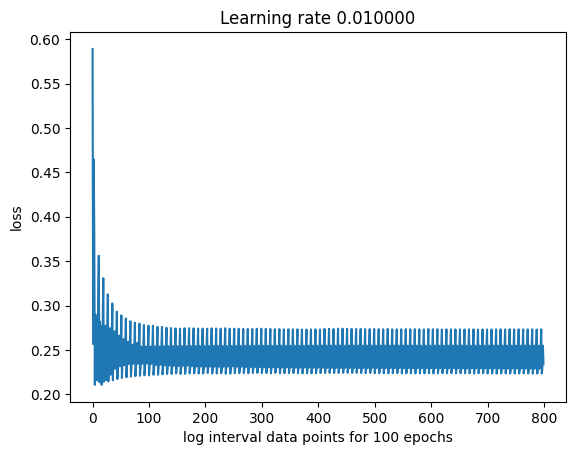

In [16]:
import matplotlib.pyplot as plt
plt.plot(train_losses)
plt.ylabel('loss')
plt.xlabel('log interval data points for 100 epochs')
plt.title("Learning rate %f"%(learning_rate))
plt.show()

In [17]:
def test_2():
    model_2.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model_2(data)
            test_loss += loss_function(output, target)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [18]:
test_losses = []
test_2()


Test set: Avg. loss: 0.0249, Accuracy: 95/200 (48%)

